In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [99]:
df = pd.read_csv('dataset_NBA.csv')
df

,Unnamed: 0,Team,season,win_match,overall_pick,position
0,0,Atlanta Hawks,2014,60.0,48.0,Forward-Center
1,1,Atlanta Hawks,2015,48.0,23.0,Guard
2,2,Atlanta Hawks,2015,48.0,43.0,Forward
3,3,Atlanta Hawks,2016,43.0,17.0,Guard
4,4,Atlanta Hawks,2016,43.0,18.0,Guard
...,...,...,...,...,...,...
591,591,Washington Wizards,2022,35.0,9.0,Forward
592,592,Washington Wizards,2023,NaN,37.0,Guard
593,593,Washington Wizards,2024,NaN,15.0,Forward
594,594,Washington Wizards,2025,NaN,10.0,Guard


In [100]:
df = df.groupby(['season', 'Team', 'win_match'], dropna=False)['overall_pick'].min().reset_index(name='total_pick')


In [101]:
# list = 'Phoenix Suns'
list = input("Ville suivi du nom de l'équipe : ")
df = df[df['Team'].isin([list])]
df

,season,Team,win_match,total_pick
0,2014,Atlanta Hawks,60.0,48.0
33,2015,Atlanta Hawks,48.0,23.0
66,2016,Atlanta Hawks,43.0,17.0
98,2017,Atlanta Hawks,24.0,61.0
128,2018,Atlanta Hawks,29.0,15.0
158,2019,Atlanta Hawks,20.0,21.0
188,2020,Atlanta Hawks,41.0,19.0
218,2021,Atlanta Hawks,43.0,3.0
248,2022,Atlanta Hawks,41.0,8.0
278,2023,Atlanta Hawks,NaN,6.0


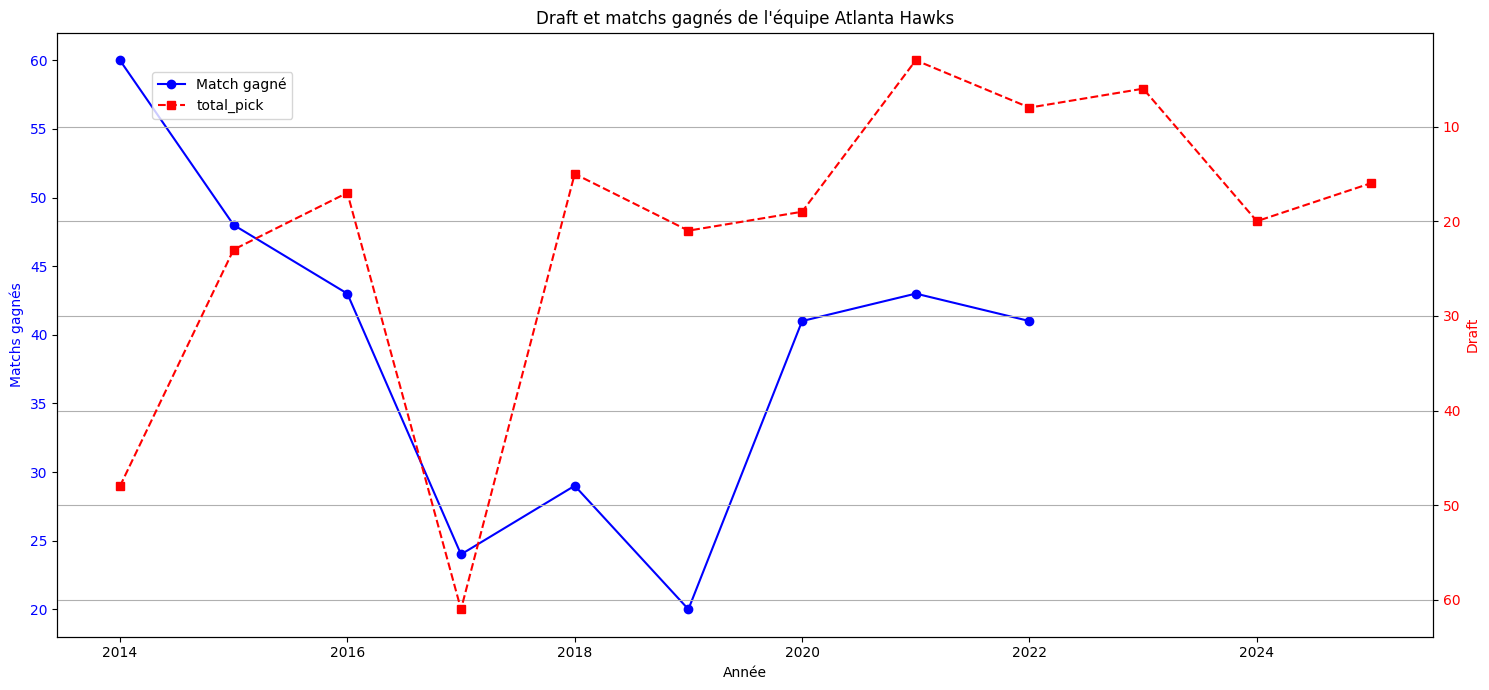

In [102]:
# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(15, 7))

# Tracer les ventes avec l'axe y principal
ax1.plot(df['season'], df['win_match'], marker='o', linestyle='-', color='b', label='Match gagné')
ax1.set_xlabel('Année')
ax1.set_ylabel('Matchs gagnés', color='b')
ax1.tick_params(axis='y', labelcolor='b')
x_filtered = df['season']
y1_filtered = df['win_match']

# Créer un deuxième axe y qui partage le même axe x
ax2 = ax1.twinx()
ax2.plot(df['season'], df['total_pick'], marker='s', linestyle='--', color='r', label='total_pick')
ax2.set_ylabel('Draft', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.invert_yaxis()
# Ajouter des titres et des labels
plt.title("Draft et matchs gagnés de l'équipe " + list)


# Afficher une légende
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
# Afficher le graphique
plt.show()

In [103]:
df.to_csv(list+'.csv')